### Table of Contents

### Data analysis (preprocessing, heap's law, zief's law, bigram)

### Word Clouds

### LDA
*  LDA over all years and logistic regression - unigram

* Logistic Regression

Note
Y variable is 1 = cited above median (4), 0 = anything less than 4

In [351]:
import pickle, re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import FreqDistVisualizer
import matplotlib.pyplot as plt
import numpy as np
import spacy

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



# Get the data and check it

In [352]:
# unpickled_df = pd.read_pickle("C:/Users/amt/Documents/0. MSc Tinbergen/block 5. NLP/extracted_data.pkl")
#unpickled_df = pd.read_pickle(r"C:\Users\marco\Desktop\NLP\extracted_data.pkl")
unpickled_df = pd.read_pickle(r"C:/Users/USER/Documents/Python/NLP/extracted_data.pkl")


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



* Take out the nan values

In [353]:
df = unpickled_df[unpickled_df['description'].notna()]
df

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



eid                            doi                   pii  \
16    2-s2.0-85103948648   10.1016/j.compag.2021.106132     S0168169921001502   
17    2-s2.0-85102449056     10.1007/s40171-021-00262-0                  None   
18    2-s2.0-85099393297  10.1016/j.tourman.2021.104288     S0261517721000078   
19    2-s2.0-85102834259      10.1016/j.dss.2021.113536     S0167923621000464   
20    2-s2.0-85101055208      10.1016/j.chb.2021.106721     S0747563221000431   
...                  ...                            ...                   ...   
5106   2-s2.0-0022028267                           None                  None   
5108   2-s2.0-0022192653   10.1016/0747-5632(85)90022-6  0747-5632(85)90022-6   
5111   2-s2.0-0000133127   10.1016/0361-3682(84)90020-5  0361-3682(84)90020-5   
5113  2-s2.0-84976796492          10.1145/953032.804603                  None   
5114   2-s2.0-0015413233    10.2190/CQX3-R31D-L15N-6ER0                  None   

     pubmed_id                                              title subtype  \
16        None  Design, development, and performance evaluatio...      ar   
17        None  Technology and Entrepreneurial Marketing Decis...      ar   
18        None  Value proposition operationalization in peer-t...      ar   
19        None  Modeling relationships between retail prices a...      ar   
20        None  “In A.I. we trust?” The effects of parasocial ...      ar   
...        ...                                                ...     ...   
5106      None                      AI MARKET PROSPECTS ARE GOOD.      ar   
5108      None  Psychological decision support software for th...      ar   
5111      None  The role of attention and memory in accounting...      ar   
5113      None       Personal computing: An Adventure of the mind      ar   
5114      None           CYBERNETICS - THE SCIENCE OF MANAGEMENT?      ar   

     subtypeDescription               creator                        afid  \
16              Article             Massah J.           60023636;60022927   
17              Article          Polas M.R.H.                   109606759   
18              Article  Ramos-Henríquez J.M.                    60003044   
19              Article               Yang X.  60090931;60016094;60004538   
20              Article               Youn S.           60104765;60000349   
...                 ...                   ...                         ...   
5106            Article            Friscia A.                   100407440   
5108            Article             Eyde L.D.                   100590404   
5111            Article           Birnberg J.           60015543;60010065   
5113            Article               Rine D.                    60010100   
5114            Article            Charles D.                        None   

                                              affilname  ... article_number  \
16    Gorgan University of Agricultural Sciences and...  ...         106132   
17         Limkokwing University of Creative Technology  ...           None   
18                             Universidad de la Laguna  ...         104288   
19    Henry B. Tippie College of Business;Dongbei Un...  ...         113536   
20     Northwestern University in Qatar;Emerson College  ...         106721   
...                                                 ...  ...            ...   
5106                                      Int Data Corp  ...           None   
5108                U.S. Office of Personnel Management  ...           None   
5111  University of Pittsburgh;The University of Ari...  ...           None   
5113                        Western Illinois University  ...           None   
5114                                               None  ...           None   

     pageRange                                        description  \
16        None  One of the applications of robotic farmer-assi...   
17      95-112  The prime concern of this study is to explore ...   
18        None  The purpose of this paper 

# Corpus warm-up:

* First, make all words in abstract lower cases
* Create the corpus of abstracts

In [354]:
def column_to_lower(df, column):
    """
        Input: df and a corresponding column
        Output: converted dataframe column 
        Function: Converts all strings in a column of a dataframe to lowercases.
    """
    return df[column].str.lower()

df.loc[:,'description'] = column_to_lower(df, 'description')

corpus = df["description"].tolist()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
#check how some values look like
corpus[0]
#type(corpus[0])
#len(corpus)
#1028 abstracts

'one of the applications of robotic farmer-assistant platforms equipped with machine vision systems is the evaluation of production yield before harvest without damaging the product. in this situation, farmers receive proper information for harvesting and post-harvesting management to decide about the required human resources, harvesting equipment, storage space, transportation, and product marketing. in this study, a machine vision system on a tracked vehicle was designed and developed for yield estimation of kiwifruit by traveling along the kiwifruit trellis. several features, i.e., intensity histogram, the histogram of oriented gradients, shape context, and local binary pattern, were extracted from the images captured from the plants, and the number of kiwifruits in the images was predicted using the support vector machine (svm). to improve the performance of the svm, its parameters were optimized using evolutionary optimization methods, namely, particle swarm optimization (pso), an

In [355]:
#to count the amount of words in the entire dataset, also repeating
corpus_all = []

for i in range(0,len(corpus)):
    res = re.findall(r'\w+', str(corpus[i]))
    corpus_all.extend(res)
    
#corpus_all
#len(corpus_all)
#type(corpus_all)
#print(corpus_all)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



* Create a list all the unique words in the corpus

In [356]:
lister = []
for i in corpus_all:
    if i not in lister:
        lister.append(i)
            
#print(lister)
print("There are", len(lister), "unique words in that list")

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



There are 13985 unique words in that list


* Tokenize and check the words most frequent in the entire corpus

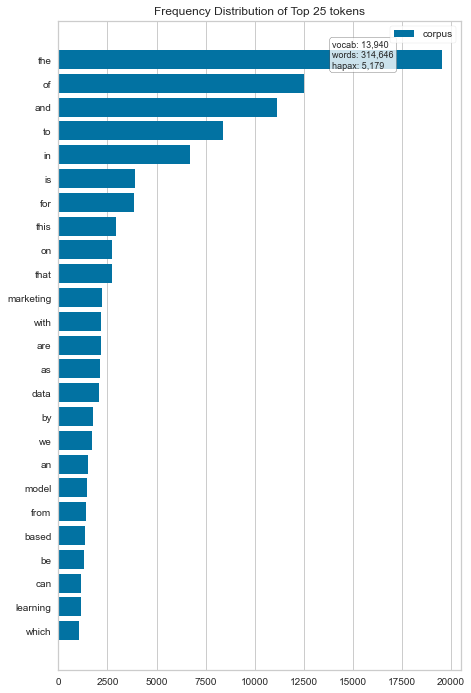

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [8]:
vectorizer = CountVectorizer()
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25, size= (520, 860))
visualizer.fit(docs)
visualizer.show()

A function that takes as inputs a visualizer object and the number of words to be plotted and returns the **Zipf's law plot**

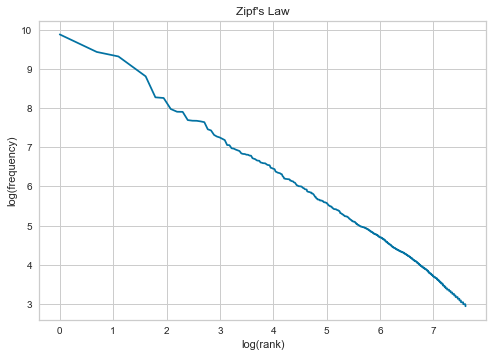

In [9]:
def zipf_law_plot(visualizer_obj, n):
    # Create a Dataframe with 2 columns: the word and the number of times it has been used
    word_count = pd.DataFrame({"word":visualizer_obj.features,
                               "count":visualizer_obj.freqdist_})
    # Ordering words based on the number of times they have been used and resetting index
    word_count = word_count.sort_values(by = "count", ascending = False)
    word_count.reset_index(inplace = True, drop = True)
    # Plotting
    plt.plot(np.log(np.arange(1,n+1)), np.log(word_count.iloc[:n,1]))
    plt.title("Zipf's Law")
    plt.xlabel("log(rank)")
    plt.ylabel("log(frequency)")

n_words_zipf = 2000 # The number of words with highest count we include in the plot
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

### Take out english stopwords and check which are the most used words

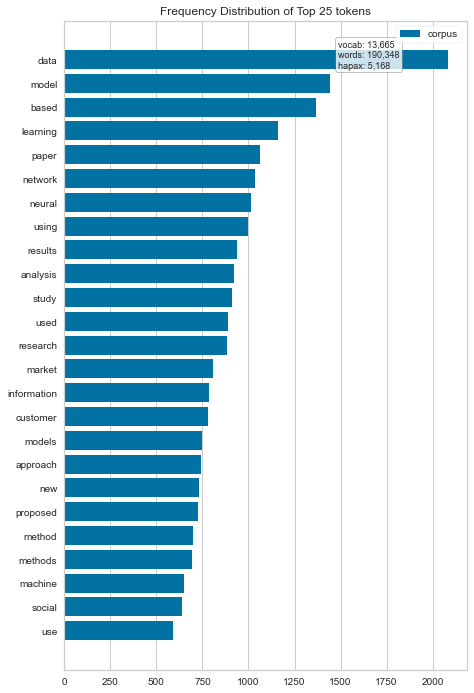

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [10]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["marketing"])

vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

**Zipf's law plot** excluding English stop words

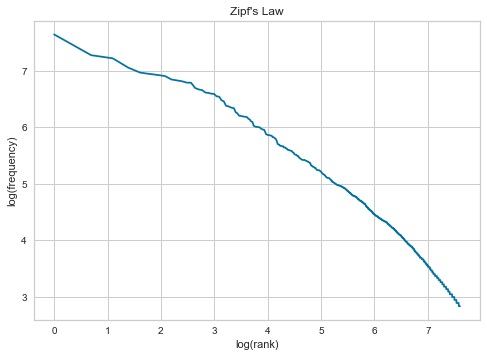

In [11]:
zipf_law_plot(visualizer, n_words_zipf)
plt.show()

In [12]:
#list of english stopwords 
#from sklearn.feature_extraction import stop_words
#print(stop_words.ENGLISH_STOP_WORDS)

In [13]:
'detail' in corpus_all

True

* Check the most popular words only for some years

In [14]:
from datetime import datetime, timedelta
df['coverDate'] = df['coverDate'].astype('datetime64')

<ipython-input-14-d93d4b1fa0d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['coverDate'] = df['coverDate'].astype('datetime64')


In [15]:
df = df.set_index('coverDate')

In [16]:
df["coverDate"] = df.index #terrible to add this columns equal to the index, but the LDA part uses it several times

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

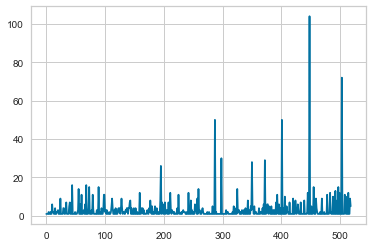

In [18]:
#number of articles published per date (dates with 0 articles are not ont he chart)
plt.plot(df.description.groupby(df.index.date).count().tolist())
plt.show()

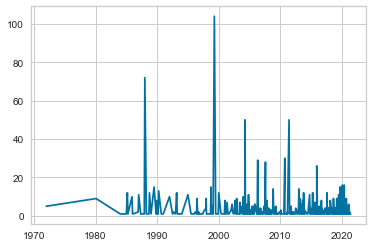

In [19]:
plt.plot(df.index.unique(),df.description.groupby(df.index.date).count().tolist())
plt.show()

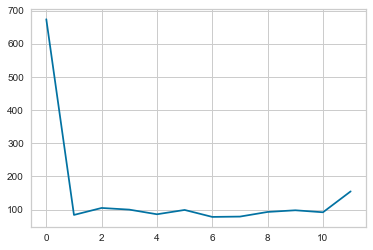

In [20]:
#number of articles published per month (months with 0 articles are not ont he chart)
#the aggregation is done per month. we can see that a lot is published in january, 
#a bit in December, but less at the end of summer
plt.plot(df.description.groupby(df.index.month).count().tolist())
plt.show()

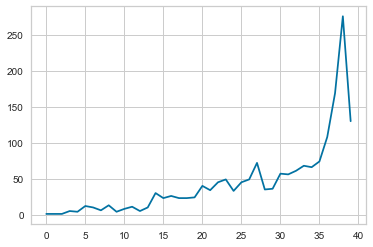

In [21]:
#number of articles published per year, for the years that 
plt.plot( df.description.groupby(df.index.year).count().tolist())
plt.show()

In [22]:
df.description.groupby(df.index.year).count()

coverDate
1972      1
1980      1
1984      1
1985      5
1986      4
1987     12
1988     10
1989      6
1990     13
1991      4
1992      8
1993     11
1994      5
1995     10
1996     30
1997     23
1998     26
1999     23
2000     23
2001     24
2002     40
2003     34
2004     45
2005     49
2006     33
2007     45
2008     49
2009     72
2010     35
2011     36
2012     57
2013     56
2014     61
2015     68
2016     66
2017     74
2018    108
2019    169
2020    276
2021    130
Name: description, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


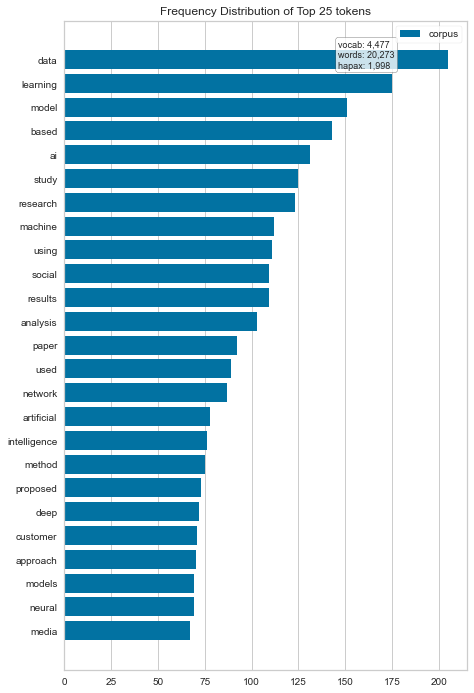

  (0, 388)	1
  (0, 3593)	1
  (0, 1739)	1
  (0, 451)	1
  (0, 3074)	1
  (0, 1557)	1
  (0, 2519)	3
  (0, 4382)	2
  (0, 4053)	1
  (0, 1594)	1
  (0, 3221)	1
  (0, 4466)	2
  (0, 1994)	1
  (0, 1145)	1
  (0, 3220)	2
  (0, 3810)	1
  (0, 1740)	1
  (0, 3391)	1
  (0, 3262)	2
  (0, 2201)	1
  (0, 1995)	3
  (0, 3119)	1
  (0, 2541)	2
  (0, 1166)	1
  (0, 3511)	1
  :	:
  (170, 150)	1
  (170, 3693)	1
  (170, 2901)	1
  (170, 69)	3
  (170, 3621)	1
  (170, 1811)	1
  (170, 847)	1
  (170, 270)	1
  (170, 3350)	2
  (170, 3706)	1
  (170, 2624)	2
  (170, 3891)	1
  (170, 3165)	1
  (170, 2296)	1
  (170, 2805)	1
  (170, 2889)	9
  (170, 1360)	1
  (170, 1822)	3
  (170, 4021)	1
  (170, 65)	1
  (170, 2334)	2
  (170, 475)	1
  (170, 1438)	1
  (170, 1135)	1
  (170, 3351)	1


In [110]:
'year 2021'
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[0:171])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

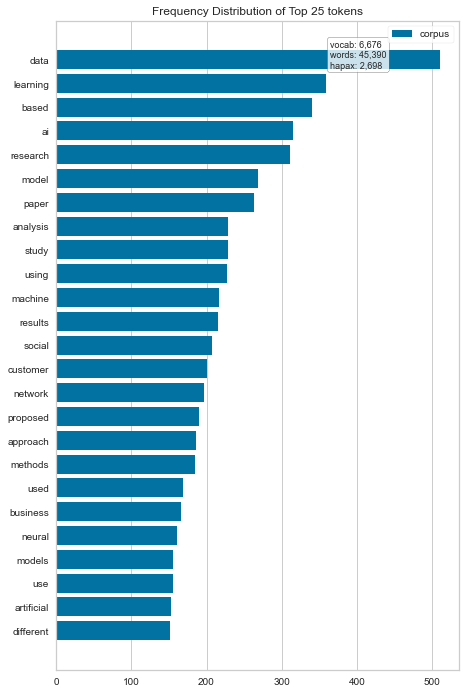

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [24]:
#year 2020
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[171:546])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

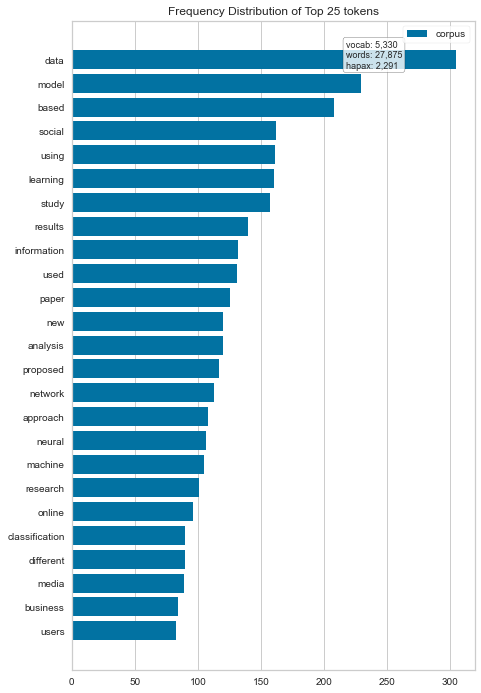

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [25]:
#year 2019
vectorizer = CountVectorizer(stop_words=my_stop_words)
docs       = vectorizer.fit_transform(corpus[546:775])
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, n=25,  size= (520, 860))
visualizer.fit(docs)
visualizer.show()

-----

**Heap's law plot**

*** The plot shows that our corpus follows the heap's law


Text(0, 0.5, 'n of unique words')

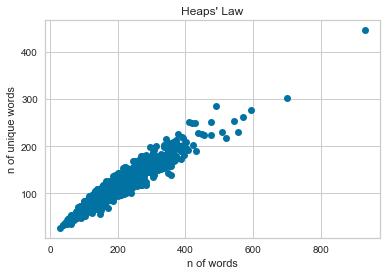

In [26]:
n_words = []
n_unique_words = []

for i in range(0,len(corpus)):
    res = [word.lower() for word in re.findall(r'\w+', corpus[i])]
    n_unique_words.append(len(set(res)))
    n_words.append(len(res))
    
plt.plot(n_words, n_unique_words, "o")
plt.title("Heaps' Law")
plt.xlabel("n of words")
plt.ylabel("n of unique words")

----

### Pre-processing:  Lemmatizing & Tokenization

In [357]:
import spacy
from nltk.stem import WordNetLemmatizer
import nltk
#nltk.download('averaged_perceptron_tagger')
spacyen = spacy.load('en_core_web_sm')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [358]:
lemmatizer = WordNetLemmatizer()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [359]:
lemmatizer.lemmatize(re.findall(r'\w+', corpus[0])[22])

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'without'

In [360]:
import nltk
#nltk.download('averaged_perceptron_tagger')

(nltk.pos_tag([lemmatizer.lemmatize(re.findall(r'\w+', corpus[0])[22])])[0][1]).lower()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



'in'

the cell below works if I do not indicate pos. If I indicate pos it does not work and I do not know what are the right names for the pos to be indicated. te pos I added is the pos nltk outputs

### lemmatize() below does not work correctly

We should add the POS for each word we are using, something like:

```python
lemmatizer.lemmatize(token, pos = 'v')
```
Otherwise it consider all words as if they were nouns and does not correctly tokenize verbs for example

```python
corpus_all_lower_lemma = []

for each1abs in corpus: 
    abstract = re.findall(r'\w+', each1abs)
    for each1word in abstract:
        sentence = []
        lemm_word = lemmatizer.lemmatize(each1word, pos = (nltk.pos_tag([each1word])[0][1]).lower())
        sentence.append(lemm_word)
    corpus_all_lower_lemma.append(sentence)
```

In [361]:
from nltk.tokenize import RegexpTokenizer
import gensim
from gensim.utils import simple_preprocess

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
            if word not in my_stop_words] for doc in texts]

corpus_tkn = corpus.copy()

tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(corpus)):
    corpus_tkn[idx] = tokenizer.tokenize(str(corpus[idx]))

corpus2 = [[token for token in doc if not token.isnumeric()] for doc in corpus_tkn]
corpus2 = [[token for token in doc if len(token) > 1] for doc in corpus_tkn]

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [362]:
bigram = gensim.models.Phrases(corpus2, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[corpus2], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def process_words(texts, stop_words=my_stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

corpus2 = process_words(corpus2)  # processed Text Data!

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [363]:
print(corpus2[1]) # Checking if it correctly added the bigrams

['prime', 'concern', 'study', 'explore', 'technology', 'influence', 'entrepreneurial', 'decision', 'world', 'pandemic', 'covid', 'study', 'use', 'sample', 'sme', 'bangladesh', 'datum', 'collect', 'send', 'questionnaire', 'electronically', 'mail', 'smart', 'pls', 'sem', 'use', 'analyse', 'datum', 'follow', 'quantitative', 'method', 'study', 'reveal', 'positive', 'significant', 'relationship', 'entrepreneurial', 'opportunity', 'recognition', 'opportunity', 'development', 'opportunity', 'exploitation', 'entrepreneurial', 'decision', 'claim', 'entrepreneurial', 'passion', 'mediate', 'relationship', 'entrepreneurial', 'opportunity', 'recognition', 'opportunity', 'development', 'entrepreneurial', 'decision', 'entrepreneurial', 'passion', 'mediate', 'relationship', 'entrepreneurial', 'opportunity', 'exploitation', 'entrepreneurial', 'decision', 'study', 'offer', 'researcher', 'broader', 'wide', 'range', 'view', 'importance', 'small', 'firm', 'researcher', 'educator', 'practitioner', 'benefit'

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



## Count corpus sentences
Note: if we need the sentences as well, we should extract them 

In [ ]:
re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0])

In [ ]:
len(re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[0]))

In [ ]:
corpus_sentences = []

for i in range(0,len(corpus)):
    #split the current abstract into sentences
    sentences = re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', corpus[i])
    #nr of sentences in current abstract
    nr_of_sentences = len(sentences)
    corpus_sentences.append(nr_of_sentences)

In [ ]:
df.loc[:,'nr_sentences_abstract'] = corpus_sentences

In [ ]:
df.nr_sentences_abstract.describe()

In [ ]:
#print(df.nr_sentences_abstract.sum(), "total number of sentences")
#print(df.nr_sentences_abstract.median(), "median")
#print(df.nr_sentences_abstract.describe())
#print(df.loc[df['nr_sentences_abstract'] == 46]['description'].values)

In [ ]:
df.loc[df['nr_sentences_abstract'] == 40]['description'].values # Before it was 46, then 41, now it seems to be 40... what did we remove?

In [ ]:
#df.loc[df['nr_sentences_abstract'] == 41]['description']
#re.split(r'[a-zA-Z][a-zA-Z][.!?][ ]|[^a-zA-Z][.!?][ ][A-Z]', df.loc[1922]["description"])

### Keywords

In [ ]:
keywords = df["authkeywords"].tolist()
print(keywords[1])

In [ ]:
keywords_paper = [] # List of the keywords associated to each paper (another list)
keywords_all = [] # List of all the keywords (the same keyword can be repeated more than once)

for i in range(0, len(keywords)):
    # Some articles do not have keywords, set it to nan
    if keywords[i] == None:
        res = pd.NA
    else:
        # The keywords are separated by " | ", using it to split them
        res = keywords[i].split(" | ")
        keywords_all.extend(res) # Must be inside the else block, otherwise get error: 'NAType' object is not iterable
    keywords_paper.append(res)

# Checking if okay
print(keywords_all[5000])
print(keywords_paper[50])

# (Very) Basic sentiment analysis

In [ ]:
from textblob import TextBlob

subjectivity_list = []
for abstr in df.description:
    # TextBlob().sentiment returns the sentiment associated with a sentence (or sentences in this case)
    subjectivity_list.append(TextBlob(abstr).sentiment[1]) # [1] because we take only the subjetivity measure
    # with .sentiment[0] we would get an index in the range [-1,+1] that reports the positity/negativity of the sentence

# merge it with the dataframe
df["abs_subjectivity"] = subjectivity_list
print(max(df["abs_subjectivity"]))
print(min(df["abs_subjectivity"]))

# check if correlated with number of citations
print(np.corrcoef(df["abs_subjectivity"], df.citedby_count))

# check one of the most subjective sentences (does not sound that subjective)
print(df[df["abs_subjectivity"] == 0.9].description.values)

In [ ]:
import pysentiment2 as ps

In [ ]:
lm = ps.LM()
list_scores = []
for i in range(0,len(corpus)):
    tokens = lm.tokenize(corpus[i])
    score = lm.get_score(tokens)
    list_scores.append(score)

In [ ]:
len(list_scores)

In [ ]:
df_sentiment = pd.DataFrame.from_dict(list_scores) 

In [ ]:
df_sentiment.head()

----

## Word cloud


In [ ]:
from wordcloud import WordCloud


long_string = ','.join(list(df['description'].values))
#print(long_string[1:100])

wordcloud = WordCloud(background_color = "white", max_words = 5000, contour_width = 3,
                     contour_color = 'steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

# LDA - unigram

In [244]:
out1 = df['description'].values #unigram

def sent_to_words(sentences):
    for sentence in sentences:
        #deacc = True -> removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc = True))

data_words = list(sent_to_words(out1))

data_words = remove_stopwords(data_words)

#print(data_words[:1][0][:30])

for i in range(len(data_words)):
    for j in range(len(data_words[i])):
        each1 = lemmatizer.lemmatize(data_words[i][j])
        data_words[i][j] = each1

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [246]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(data_words)

texts = data_words

corpus = [id2word.doc2bow(text) for text in texts]


#print(corpus[:1][0][:30])

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'data_words' is not defined

In [ ]:
from pprint import pprint

num_topics = 15

lda_model = gensim.models.LdaMulticore(corpus = corpus, id2word = id2word, 
                                      num_topics = num_topics, workers = 7,
                                      eval_every=1, chunksize = 100, 
                                      passes = 50, decay = 0.6)

lda_model.save('lda_model.model')

doc_lda = lda_model[corpus]


In [ ]:
print(lda_model.print_topics(20, num_words = 20))

In [ ]:
#print(lda_model.print_topics(20, num_words = 15)[:10])

train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(num_topics)]
    train_vecs.append(topic_vec)
    
print(len(train_vecs))

y should be weighted because earlier publications usually dont have 
fair chance to be cited. Thus, we weight the y variable. 
Or, we should delete the publications published after 2020-6-1

For now, no logical methods is proposed. Thus, we restrict our sample size.

In [252]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
import numpy as np
print(df.coverDate)
X = np.column_stack([train_vecs, df.coverDate, df.h_index])
y = np.array(df.y)

kf = KFold(10, shuffle = True, random_state = 42)

cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

coverDate
2021-06-01   2021-06-01
2021-06-01   2021-06-01
2021-06-01   2021-06-01
2021-06-01   2021-06-01
2021-06-01   2021-06-01
                ...    
1985-03-01   1985-03-01
1985-01-01   1985-01-01
1984-01-01   1984-01-01
1980-02-01   1980-02-01
1972-01-01   1972-01-01
Name: coverDate, Length: 1743, dtype: datetime64[ns]


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: The DTypes <class 'numpy.dtype[datetime64]'> and <class 'numpy.dtype[float32]'> do not have a common DType. For example they cannot be stored in a single array unless the dtype is `object`.

#We create a handful of LDA models with different topic values, 
#then see how these perform in the supervised classification model training
#This is specific to our goal

 We can also run HDP, which seeks to learn the correct number of topics
 from the data, that is, you don't need to provide a fixed number of topics.
 In the end, we expect to run a basic logistic regression - to be done later

When topic = 20

Logistic Regression Val f1: 0.564 +- 0.045
Logisitic Regression SGD Val f1: 0.504 +- 0.067
SVM Huber Val f1: 0.462 +- 0.304
    
When topic = 15
Logistic Regression Val f1: 0.545 +- 0.047
Logisitic Regression SGD Val f1: 0.563 +- 0.049
SVM Huber Val f1: 0.402 +- 0.329
    
When topic = 10

Logistic Regression Val f1: 0.563 +- 0.047
Logisitic Regression SGD Val f1: 0.561 +- 0.090
SVM Huber Val f1: 0.401 +- 0.328
    
When topic = 5

Logistic Regression Val f1: 0.530 +- 0.037
Logisitic Regression SGD Val f1: 0.532 +- 0.066
SVM Huber Val f1: 0.393 +- 0.321

## LDA - bigram + trigram + logistic regression


In [364]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
dictionary2 = Dictionary(corpus2)
dictionary2.filter_extremes(no_below=20, no_above=0.5)
bi_corpus = [dictionary2.doc2bow(doc) for doc in corpus2]

topic = []
perplexity= []
decay = []

num_topics = 20
temp = dictionary2[0]  # This is only to "load" the dictionary.

# #topic: 20, decay: 0.6
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = num_topics, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))

topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



1.5828554630256434e-07


In [216]:
# #topic: 10, decay: 0.6
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 10, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2.3418644510844068e-07


In [217]:
# #topic: 30, decay: 0.6
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 30, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.0616836586297486e-07


In [218]:
# #topic: 40, decay: 0.6
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 40, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7.79159069389661e-08


In [219]:
# #topic: 200, decay: 0.6
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 200, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3.131366616877401e-09


In [220]:
# #topic: 100, decay: 0.6
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 100, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1.727712604297752e-08


In [221]:
# #topic: 150, decay: 0.6
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 150, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.6)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6.6861809356129825e-09


In [222]:
# #topic: 100, decay: 0.7
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 100, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.7)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9.396255605807459e-09


In [223]:
# #topic: 30, decay: 0.8
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 30, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.8)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7.510398196411202e-08


In [225]:
# #topic: 100, decay: 0.7
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 100, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.7)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


9.364359916221292e-09


In [365]:
# #topic: 100, decay: 0.8
lda_model = gensim.models.LdaMulticore(corpus = bi_corpus, id2word = dictionary2, 
                                      num_topics = 100, workers = 7, eval_every = None,
                                    chunksize = 100, passes = 10, decay = 0.8)
print(10 ** lda_model.log_perplexity(bi_corpus, 1000))
topic.append(lda_model.num_topics)
perplexity.append(10 ** lda_model.log_perplexity(bi_corpus, 1000))
decay.append(lda_model.decay)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



5.193865301488412e-09


In [243]:
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

Table = pd.DataFrame({'Topic numbers' : topic, 'Decay' : decay,  'Perplexity' : perplexity})
print(Table.to_latex(index=False))  

\begin{tabular}{rrr}
\toprule
 Topic numbers &  Decay &   Perplexity \\
\midrule
            20 &    0.6 & 1.639042e-07 \\
            10 &    0.6 & 2.341582e-07 \\
            30 &    0.6 & 1.061673e-07 \\
            40 &    0.6 & 7.786663e-08 \\
           200 &    0.6 & 3.133628e-09 \\
           100 &    0.6 & 1.726054e-08 \\
           150 &    0.6 & 6.691952e-09 \\
           100 &    0.7 & 9.401537e-09 \\
            30 &    0.8 & 7.508386e-08 \\
           100 &    0.8 & 5.517294e-09 \\
           100 &    0.7 & 9.371606e-09 \\
\bottomrule
\end{tabular}



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [367]:
train_vecs = []
for i in range(len(df)):
    top_topics = (
        lda_model.get_document_topics(bi_corpus[i], minimum_probability = 0.0) #we capture the instances where a review is 
        #presented with 0% in some topics, and the representation for each review will add up to 100%
    )
    
    topic_vec = [top_topics[i][1] for i in range(100)]
    train_vecs.append(topic_vec)
    
print(train_vecs[1])

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.00016950218, 0.0001695

In [408]:
#frequency plot
location = []

for i in range(len(train_vecs)):
    maxi = max(train_vecs[i])
    loc = train_vecs[i].index(maxi)
    location.append(loc + 1)
    
df['location'] = location

print(df['location'])

468      7
1580    85
2726    45
2982     9
1815    61
        ..
4864    46
4243    76
4246    29
2449    69
4209    62
Name: location, Length: 1743, dtype: int64


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-408-e90c10472efb>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<AxesSubplot:>

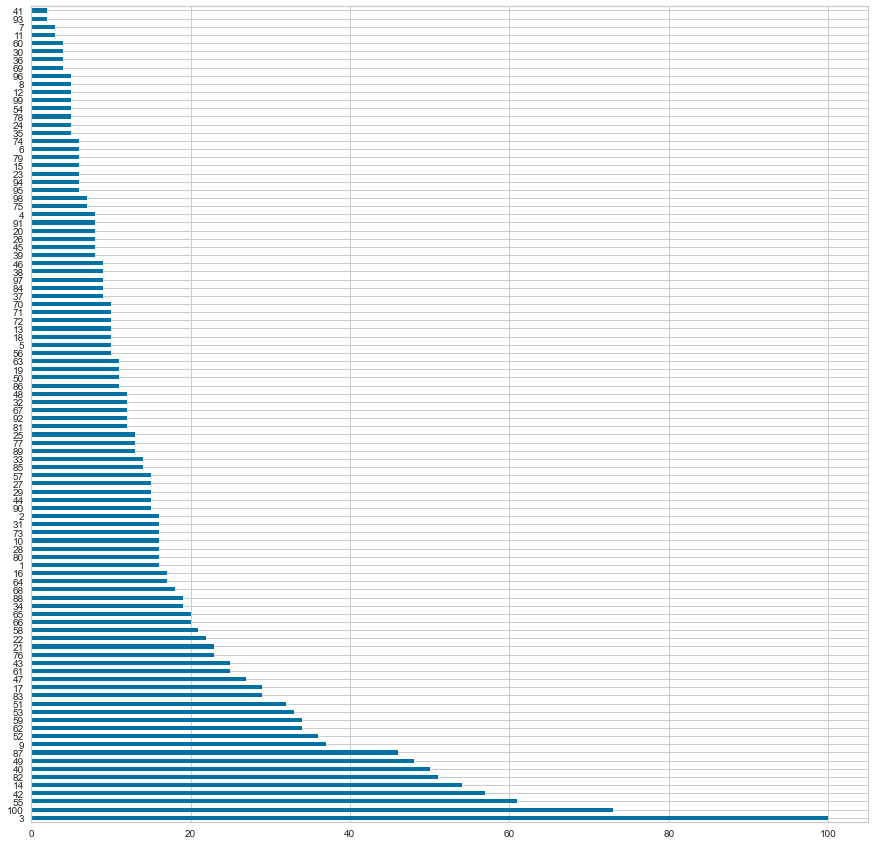

In [411]:
from matplotlib import pyplot as plt

f, ax = plt.subplots(1, 1, figsize = (15, 15))

df['location'].value_counts().plot(kind = 'barh') #horizontal frequency plot

In [380]:
#per year 
import plotly.express as px

fig = px.bar(df, x="coverDate", y="location", color="location", barmode = 'stack')

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Documents",
)

fig.show()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [401]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+str(num_topics) + '.html')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [400]:
pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
2      0.191633  0.086463       1        1  4.275003
99     0.048667  0.080608       2        1  2.793282
54     0.052321  0.027503       3        1  2.680182
39    -0.135722  0.043787       4        1  2.439195
86     0.032787  0.006230       5        1  2.410341
...         ...       ...     ...      ...       ...
35     0.040805  0.024114      96        1  0.377114
92    -0.125612 -0.004572      97        1  0.333798
10    -0.014735 -0.076413      98        1  0.270559
6      0.016528  0.087084      99        1  0.220535
40     0.037585  0.066903     100        1  0.158872

[100 rows x 5 columns], topic_info=               Term         Freq        Total  Category  logprob  loglift
159           model  2302.000000  2302.000000   Default  30.0000  30.0000
133        customer  1196.000000  1196.000000   Default  29.0000  29.0000
656           agent   192.000000   192.000000   Default  28.0000  28.0000
495          market  1062.000000  1062.000000   Default  27.0000  27.0000
245         network  1558.000000  1558.000000   Default  26.0000  26.0000
..              ...          ...          ...       ...      ...      ...
647        identify     2.446652   379.104165  Topic100  -4.4627   1.4017
123        variable     2.223904   309.500943  Topic100  -4.5582   1.5091
703         cluster     2.039477   234.951079  Topic100  -4.6448   1.6981
98   classification     2.069944   480.476362  Topic100  -4.6299   0.9976
506        analysis     2.145696   927.212287  Topic100  -4.5940   0.3761

[5200 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
560       1  0.086475  ability
560       2  0.014413  ability
560       3  0.050444  ability
560       4  0.050444  ability
560       5  0.043238  ability
...     ...       ...      ...
57       51  0.023150    yield
57       60  0.011575    yield
57       66  0.034725    yield
57       82  0.011575    yield
57       99  0.011575    yield

[30403 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 100, 55, 40, 87, 49, 14, 42, 52, 82, 9, 62, 17, 53, 43, 59, 51, 61, 83, 47, 65, 86, 58, 34, 57, 18, 27, 88, 76, 80, 22, 21, 10, 77, 31, 66, 89, 48, 90, 28, 98, 1, 68, 64, 73, 44, 72, 39, 16, 29, 84, 33, 5, 56, 85, 2, 25, 13, 92, 67, 71, 19, 63, 46, 50, 45, 81, 4, 96, 38, 70, 32, 91, 95, 99, 37, 78, 15, 79, 6, 20, 74, 8, 35, 60, 69, 26, 75, 97, 94, 54, 30, 24, 23, 12, 36, 93, 11, 7, 41])

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



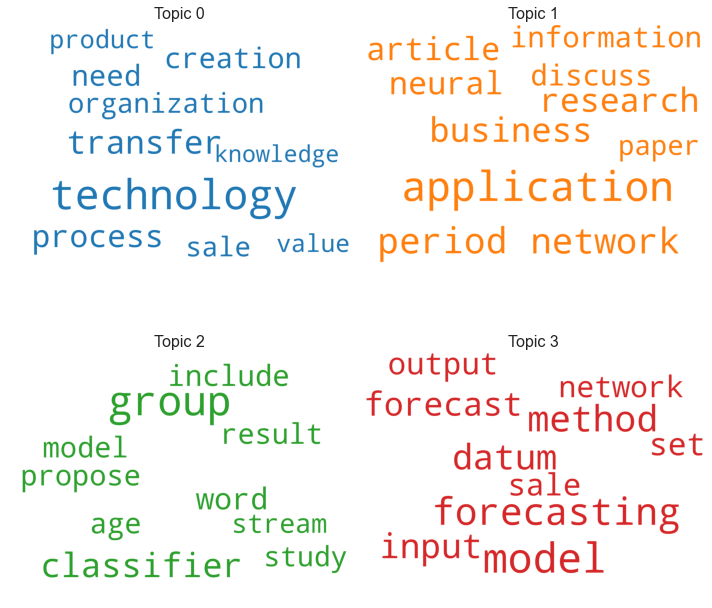

In [382]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=None,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

    plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [330]:
from collections import Counter

Counter(df.coverDate).keys()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1980', '1972'])

In [58]:
import pyLDAvis.gensim_models
import pickle
import pyLDAvis
import os

pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/lda_'+str(num_topics))

if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, bi_corpus, dictionary2)
    with open(LDAvis_data_filepath,'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_prepared, './results/lda_'+str(num_topics) + '.html')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: 'numpy.float32' object is not callable

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.15575546,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.407395,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.08773104,
  0.00012988328,
  0.00012988328,
  0.00012988328,
  0.0001

## Logistic Regression - Still need to add the sentiments

### X: Topic distribution per corpus, year, Sentiment, author publication score, first author's university rank, 

### y: citation number

### Things to do
* k-cv to choose the optimal topic numbers
* bigram
* interaction term

### Results

We see that a normal logistic model performs the best in terms of f1 score

* We can try other diagnostics.

In [378]:
#logistic regression - unigram
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
import numpy as np

df.coverDate = df.coverDate.astype(str).str[0:4]

X = np.column_stack([train_vecs, df.coverDate, df.h_index])
y = np.array(df.citedby_count)
y[y<=np.mean(y)] = 0
y[y>np.mean(y)] = 1


kf = KFold(10, shuffle = True, random_state = 42)

lr_score , lrsgd_score, svcsgd_score, cv_lr_f1, cv_lrsgd_f1, cv_svcsgd_f1, = [], [], [], [], [], []

for train_ind, val_ind in kf.split(X,y):
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind]
    
    scaler = StandardScaler()
    X_train_scale = scaler.fit_transform(X_train)
    X_val_scale = scaler.transform(X_val)
    
    lr = LogisticRegression(
        class_weight = 'balanced',
        solver = 'saga',
        fit_intercept = True,
        max_iter = 10000
    ).fit(X_train_scale, y_train)
    
    
    y_pred = lr.predict(X_val_scale)
    cv_lr_f1.append(f1_score(y_val, y_pred, average='binary'))
    lr_score.append(lr.score(X_val, y_val))
    
    sgd = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        loss='log',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
    
    y_pred = sgd.predict(X_val_scale)
    cv_lrsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    lrsgd_score.append(sgd.score(X_val, y_val))
    
    # SGD Modified Huber
    sgd_huber = SGDClassifier(
        max_iter=10000,
        tol=1e-3,
        alpha=20,
        loss='modified_huber',
        class_weight='balanced'
    ).fit(X_train_scale, y_train)
                       
    y_pred = sgd_huber.predict(X_val_scale)
    cv_svcsgd_f1.append(f1_score(y_val, y_pred, average='binary'))
    svcsgd_score.append(sgd_huber.score(X_val, y_val))

print(f'Logistic Regression Val f1: {np.mean(cv_lr_f1):.3f} +- {np.std(cv_lr_f1):.3f}')
print(f'Logisitic Regression SGD Val f1: {np.mean(cv_lrsgd_f1):.3f} +- {np.std(cv_lrsgd_f1):.3f}')
print(f'SVM Huber Val f1: {np.mean(cv_svcsgd_f1):.3f} +- {np.std(cv_svcsgd_f1):.3f}')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:443: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:93: DeprecationWarn

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addit

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addit

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addit

Logistic Regression Val f1: 0.483 +- 0.065
Logisitic Regression SGD Val f1: 0.428 +- 0.055
SVM Huber Val f1: 0.092 +- 0.148


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:309: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addit

In [257]:
y<=np.mean(y)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ True,  True,  True, ..., False,  True,  True])

In [ ]:
print(f'Logistic Regression Accuracy:{np.mean(lr_score)}')
print(f'Logistic Regression SGD Accuracy:{np.mean(lrsgd_score)}')
print(f'SVM Huber Accuracy:{np.mean(svcsgd_score)}')